In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
dataset=pd.read_csv('C:/Users/vpras/OneDrive/Desktop/Sixth Sem/ML/TechIntern/Task1/Sport car price1.csv')
dataset

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price
0,Porsche,911,2022,3,379,331,4,"1,01,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"2,74,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"3,33,750"
3,Audi,R8,2022,5.2,562,406,3.2,"1,42,700"
4,McLaren,720S,2021,4,710,568,2.7,"2,98,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"30,00,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"20,00,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"10,00,000"
1005,Pagani,Huayra,2021,6,764,738,3,"26,00,000"


In [4]:
dataset.isnull().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price                       0
dtype: int64

In [5]:
dataset=dataset.dropna()
dataset

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price
0,Porsche,911,2022,3,379,331,4,"1,01,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"2,74,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"3,33,750"
3,Audi,R8,2022,5.2,562,406,3.2,"1,42,700"
4,McLaren,720S,2021,4,710,568,2.7,"2,98,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"30,00,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"20,00,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"10,00,000"
1005,Pagani,Huayra,2021,6,764,738,3,"26,00,000"


In [6]:
dataset.isnull().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price                      0
dtype: int64

In [7]:
# Remove duplicate rows based on all columns
print("Total No of rows = ", len(dataset), "\n")
dataset = dataset.drop_duplicates()
print(dataset)
print("\nNo of rows after duplicates were removed = ", len(dataset))

Total No of rows =  995 

         Car Make Car Model  Year Engine Size (L) Horsepower Torque (lb-ft)  \
0         Porsche       911  2022               3        379            331   
1     Lamborghini   Huracan  2021             5.2        630            443   
2         Ferrari   488 GTB  2022             3.9        661            561   
3            Audi        R8  2022             5.2        562            406   
4         McLaren      720S  2021               4        710            568   
...           ...       ...   ...             ...        ...            ...   
999        Nissan      370Z  2021             3.7        332            270   
1002   Koenigsegg     Jesko  2022               5       1280           1106   
1003        Lotus     Evija  2021  Electric Motor       1972           1254   
1005       Pagani    Huayra  2021               6        764            738   
1006        Rimac    Nevera  2021  Electric Motor       1888           1696   

     0-60 MPH Time (secon

In [8]:
# target Price column
dataset['Price'] = dataset['Price'].apply(lambda x:str(x).replace(',','')).astype(int)

dataset['Price']

0        101200
1        274390
2        333750
3        142700
4        298000
         ...   
999       30090
1002    3000000
1003    2000000
1005    2600000
1006    2400000
Name: Price, Length: 707, dtype: int32

In [9]:
#Label encoding 

le = LabelEncoder()

dataset.loc[:, 'Car Make'] = le.fit_transform(dataset['Car Make'])
dataset.loc[:, 'Engine Size (L)'] = le.fit_transform(dataset['Engine Size (L)'])
dataset.loc[:, 'Car Model'] = le.fit_transform(dataset['Car Model'])
dataset.loc[:, 'Horsepower'] = le.fit_transform(dataset['Horsepower'])
dataset.loc[:, 'Torque (lb-ft)'] = le.fit_transform(dataset['Torque (lb-ft)'])
dataset.loc[:, '0-60 MPH Time (seconds)'] = le.fit_transform(dataset['0-60 MPH Time (seconds)'])


In [10]:
dataset.describe()


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.00000,7.070000e+02
mean,15.705799,85.785007,2021.151344,20.291372,65.868458,48.842999,20.71570,3.808800e+05
std,9.023012,48.880373,2.347564,8.731271,29.365499,23.050676,7.99237,7.652793e+05
min,0.000000,0.000000,1965.000000,0.000000,0.000000,0.000000,0.00000,2.500000e+04
25%,8.000000,52.000000,2021.000000,15.000000,47.000000,31.000000,15.00000,7.000000e+04
50%,16.000000,80.000000,2021.000000,18.000000,66.000000,47.000000,20.00000,1.324000e+05
75%,23.000000,123.500000,2022.000000,28.000000,89.000000,69.000000,25.00000,2.250000e+05
max,37.000000,175.000000,2023.000000,44.000000,120.000000,91.000000,42.00000,5.200000e+06


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Car Make                 707 non-null    int32
 1   Car Model                707 non-null    int32
 2   Year                     707 non-null    int64
 3   Engine Size (L)          707 non-null    int32
 4   Horsepower               707 non-null    int32
 5   Torque (lb-ft)           707 non-null    int32
 6   0-60 MPH Time (seconds)  707 non-null    int32
 7   Price                    707 non-null    int32
dtypes: int32(7), int64(1)
memory usage: 30.4 KB


In [12]:
from datetime import date

CURRENT_YEAR = date.today().year  ## NOTE TO DECLARE CURRENT YEAR AS A CONSTANT(VARIBLE NAME ALL CAPS) IN ORDER TO WORK


In [13]:
dataset

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price
0,28,18,2022,11,39,27,25,101200
1,16,98,2021,24,89,43,13,274390
2,11,5,2022,17,96,67,15,333750
3,5,130,2022,24,69,38,17,142700
4,21,15,2021,18,101,68,12,298000
...,...,...,...,...,...,...,...,...
999,24,1,2021,15,32,20,36,30090
1002,15,99,2022,23,10,6,10,3000000
1003,18,76,2021,42,20,8,5,2000000
1005,25,95,2021,27,111,87,15,2600000


In [14]:
X = dataset.drop(columns=['Price'],axis=1)
Y = dataset['Price']

X_train, X_test, y_train, y_test = train_test_split(X, Y,  test_size=0.2, random_state=42)



In [16]:
from xgboost import XGBRegressor
model = XGBRegressor()
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [17]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [18]:
# over train set for overfitting and underfitting check
y_train_pred = model.predict(X_train)
print("Train value predicted : ",y_train_pred)

# over actual test set
y_test_pred = model.predict(X_test)
print("\n\nTest value predicted : ",y_test_pred)

Train value predicted :  [ 127046.43   329320.88   420151.94    63837.297   43140.555  188676.45
  207214.03    39055.85    67624.64   142551.83    46917.637   93459.25
   45613.36    41834.13   420151.94    61717.35  3000124.8    199477.11
 1050775.8     46289.418  148670.27    50247.812   30286.01   624409.2
   62167.527   66282.54   199441.56    80467.31    46467.832   67150.62
   68943.43   316305.97    52626.87   158678.16   101900.84    39055.85
   63973.062  327000.25   113536.95    49813.22    63973.062   30972.254
   46289.418 1799680.9     45983.227   67393.8     71428.164   78755.
   78691.35   154702.9    101772.62   331652.12  2400018.8    335865.56
 2803907.2     60875.625   26607.443   62908.137   98903.13   142551.83
  220119.53    76491.83    72697.97    80892.98   517700.72   131918.02
  148366.69    67393.8    198050.42   179378.4     41638.09   499554.28
 2998793.     211662.62   160376.64   498923.53   198050.42    69831.96
   68505.92  2375092.     324143.88    77


### Result And Analysis


In [19]:
score_1 = metrics.r2_score(y_train, y_train_pred)
print(" Score over train set : ", score_1*100) 


 Score over train set :  99.89718255049193


In [20]:
score_2 = metrics.r2_score(y_test,y_test_pred)
print("Score over test set : ", score_2*100) 

Score over test set :  98.25985351507256


Text(0, 0.5, 'Car Price')

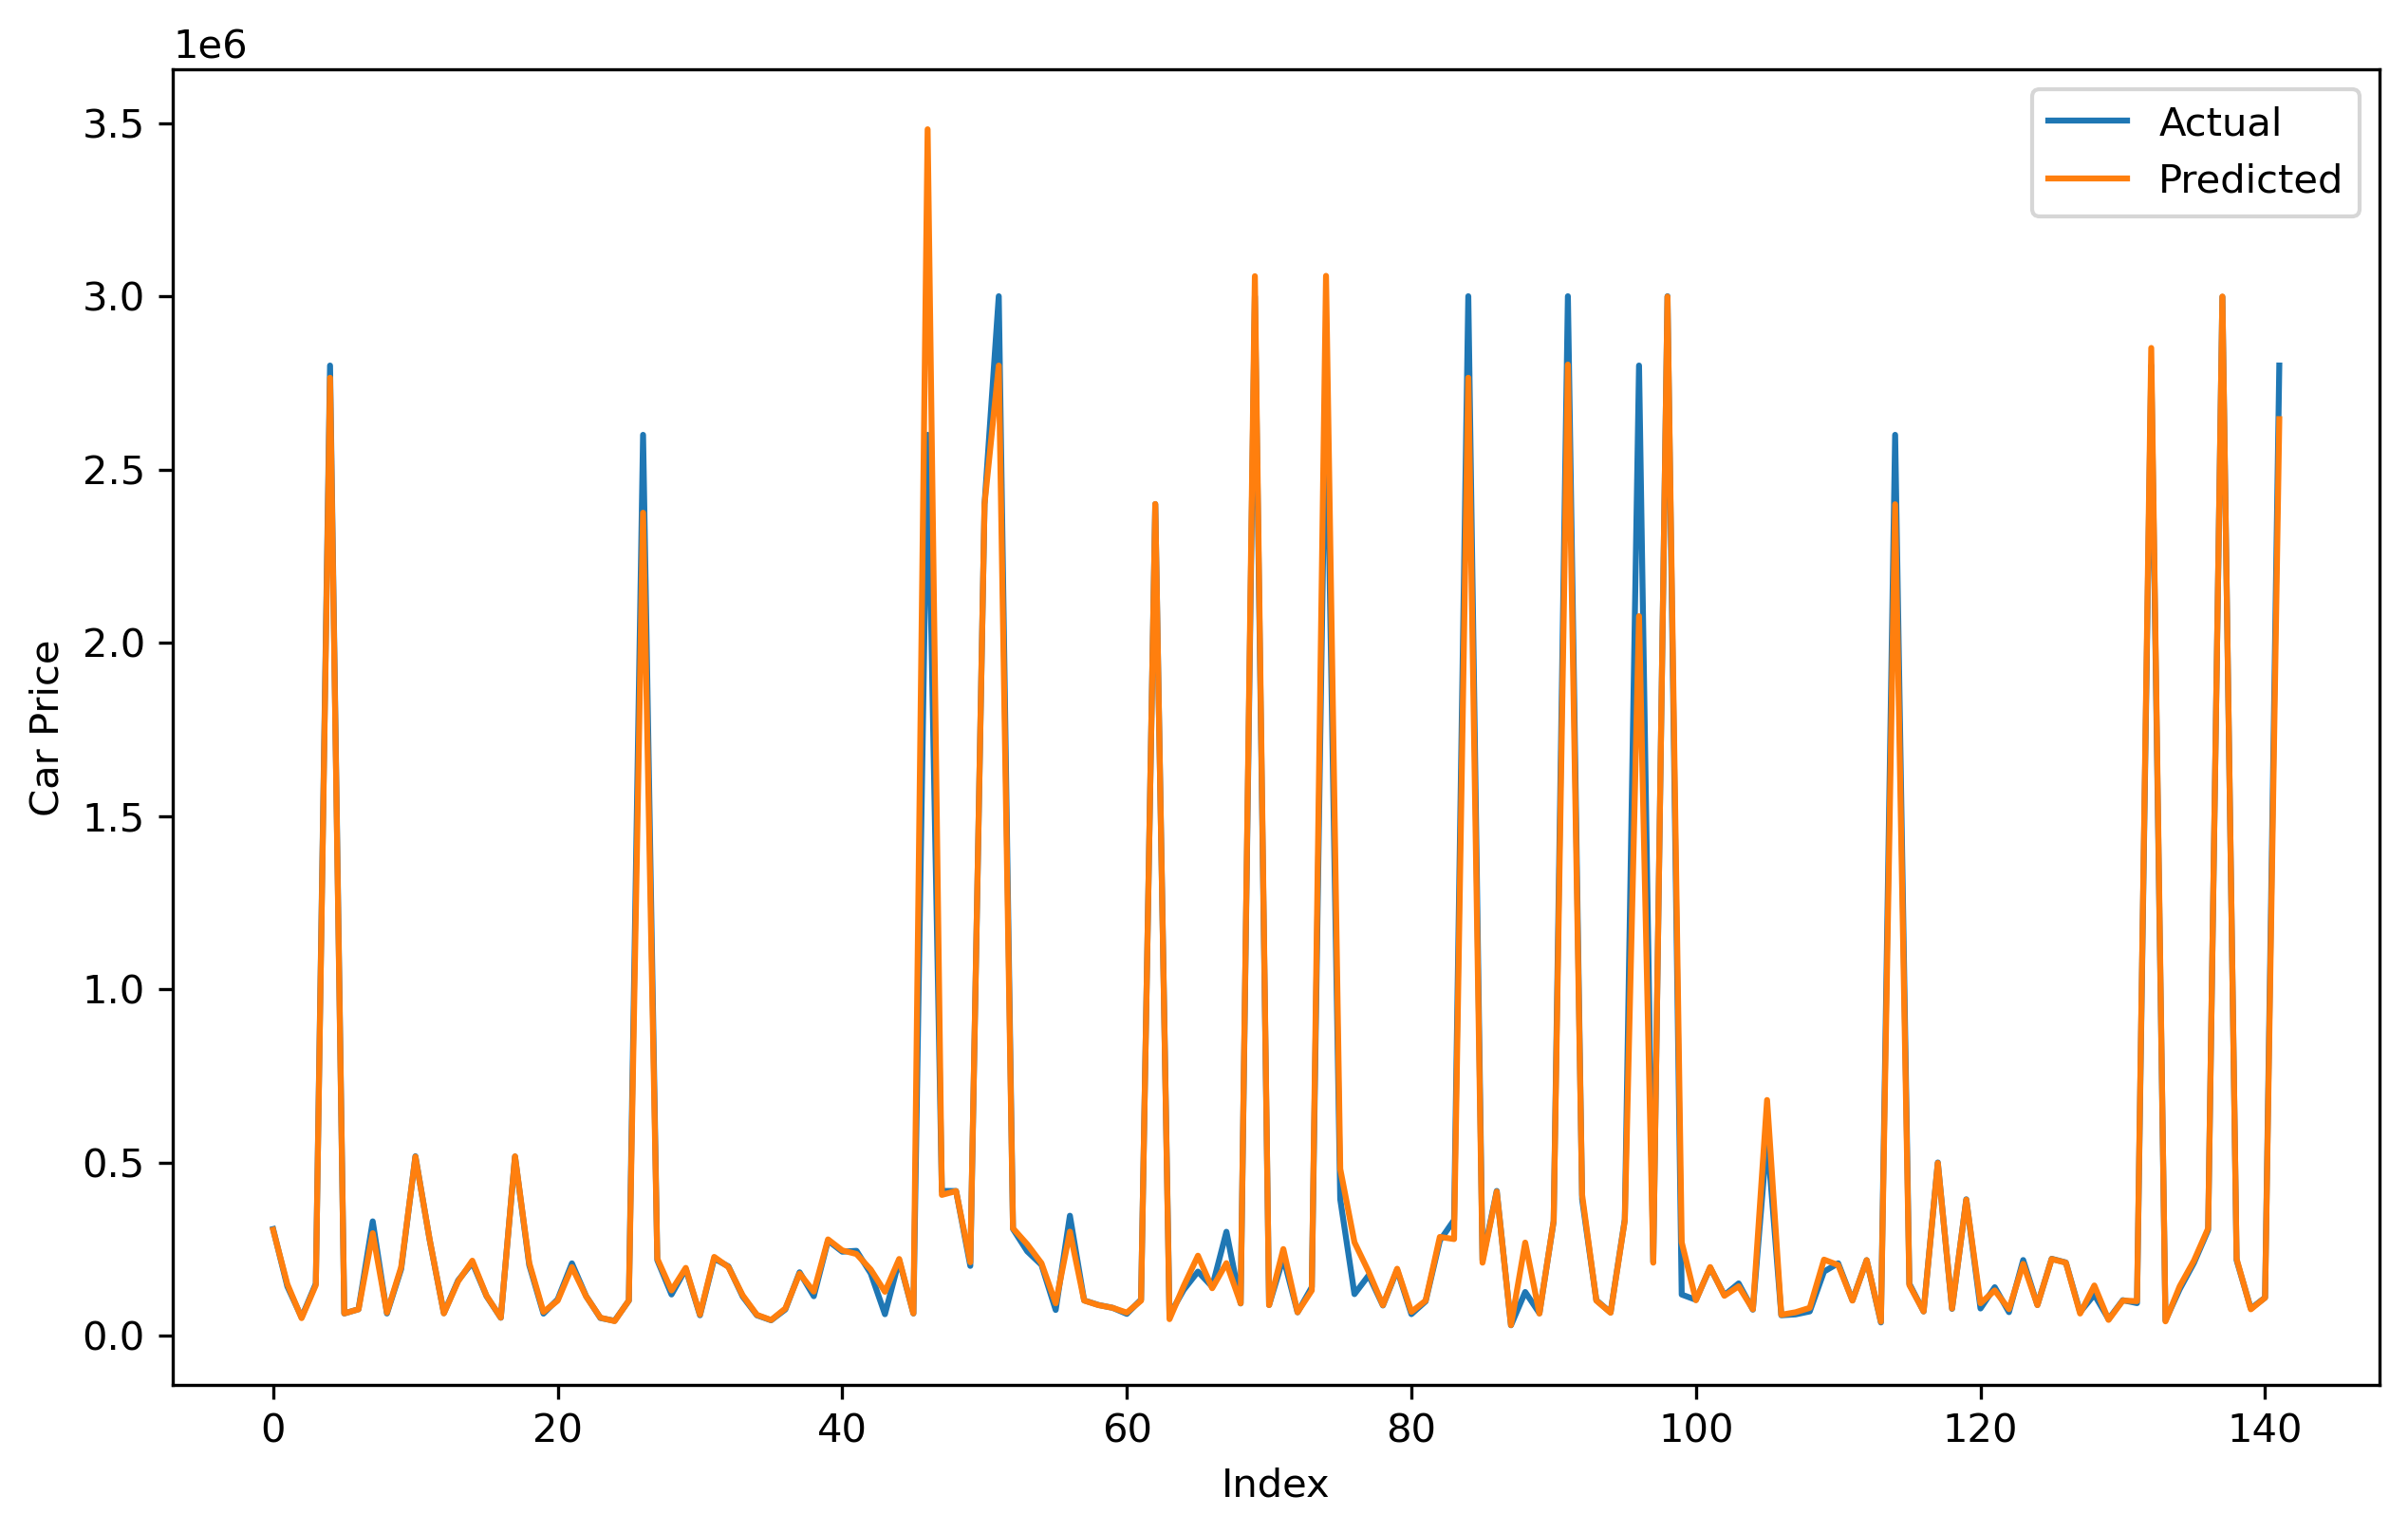

In [21]:
# create x-axis data from 0 till len of y_test(y_train cant be plotted easily due to multi parameters)
x_size = range(len(y_test))

# plot actual y_test and predicted y_test_pred values
plt.figure(figsize=(10,6), dpi=300) # increase figure size and DPI
plt.plot(x_size, y_test, label='Actual', antialiased=True) # enable anti-aliasing
plt.plot(x_size, y_test_pred, label='Predicted', antialiased=True) # enable anti-aliasing

# add legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Car Price')
